<a href="https://colab.research.google.com/github/rodolfobetanzos/SaturdaysAI/blob/master/RBC_SaturdaysAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Drive**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [638]:

from google.colab import drive
drive.mount('/content/PATH')

Drive already mounted at /content/PATH; to attempt to forcibly remount, call drive.mount("/content/PATH", force_remount=True).


In [639]:
PATH = "PATH/My[[:space:]]Drive/AI/RBC_SMX"
!ls {PATH}

Datos_geonica.csv	       VHSA_GEONICA_FUNCIONES.csv
full_data.csv		       VHSA_GEONICA_PARAMETROS.csv
gato.csv		       VHSA_GEONICA_RANGOS_ALARMAS.csv
Sx300.csv		       VHSA_RTMS_2019_2020.csv
test.csv		       VHSA_RTMS_2019.csv
VHSA_GEONICA_2019.csv	       VHSA_RTMS_ID.csv
VHSA_GEONICA_CONSULTA.csv      weather2018-2020.csv
VHSA_GEONICA_ESTADISTICOS.csv


# **PROPHET**

In [0]:
from fbprophet import Prophet

In [0]:
vhsa_prophet=pd.read_csv('PATH/My Drive/AI/RBC_SMX/full_data.csv', sep=',', quotechar='"',error_bad_lines=False)

In [642]:
vhsa_prophet

,measuring_date,0,Bateria (Volts),Humedad relativa (%),Humedad suelo mineral (m3/m3),Humedad suelo organico (m3/m3),Indice refraccion (VE),Lluvia Accu (mm),Lluvia Ins (mm),NaCl pavimento (%),Nivel agua pavimento (mm),Presion atmosferica (mb),Puerta Abierta Ins,Punto rocio (°C),Temperatura aire (°C),Temperatura pavimento (°C),Temperatura suelo (°C),Velocidad viento (Km/h),Viento direccion (°),Visibilidad (m),Carril1,Carril2,Volume_total
0,2018-08-01,0.0,13.67639,97.52651,0.423755,0.501240,5.159547,4.170003e+01,2.000000e-01,0.1,0.253,1016.317,0.0,24.35053,33.28250,59.27000,40.51090,19.660470,356.9752,10036.52,2254.0,478.0,2732.0
1,2018-08-02,0.0,13.38554,96.80051,0.379629,0.453101,4.788881,1.010000e+01,0.000000e+00,0.1,0.745,1015.436,0.0,24.93529,32.67450,53.74000,39.26754,12.478210,359.5107,10034.29,2269.0,573.0,2842.0
2,2018-08-03,0.0,13.60816,91.23650,0.286073,0.351041,4.003013,0.000000e+00,0.000000e+00,0.0,0.000,1015.963,0.0,24.73622,33.37600,58.26000,38.23433,13.203020,155.9569,10032.42,1900.0,390.0,2290.0
3,2018-08-04,0.0,13.47807,93.30450,0.241150,0.302034,3.625659,0.000000e+00,0.000000e+00,0.0,0.000,1015.436,0.0,23.98996,33.31700,61.07000,40.17662,15.030010,168.2272,10034.73,1935.0,340.0,2275.0
4,2018-08-05,0.0,13.42280,93.59100,0.354046,0.425193,4.573989,3.599999e+00,1.000000e-01,0.1,0.259,1016.381,0.0,24.45906,33.29501,58.42000,39.76162,18.629970,153.7696,10033.96,1356.0,263.0,1619.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,2020-04-16,0.0,13.31214,93.34001,0.037378,0.079737,1.913977,-3.330669e-14,-5.551115e-17,0.0,0.000,1016.811,0.0,25.93962,33.46900,32.83333,41.42786,10.556100,356.8407,10040.38,444.0,34.0,478.0
625,2020-04-17,0.0,13.69420,93.32101,0.039688,0.082257,1.933382,-3.247402e-14,-5.551115e-17,0.0,0.000,1016.887,0.0,26.23873,35.80901,40.97500,45.99167,12.465040,356.2198,10043.58,511.0,35.0,546.0
626,2020-04-18,0.0,13.56426,95.71099,0.036771,0.079075,1.908874,3.240000e-01,-5.551115e-17,0.0,0.000,1015.223,0.0,26.79670,35.28300,41.30000,44.62037,8.238906,359.3000,10043.54,313.0,17.0,330.0
627,2020-04-19,0.0,13.84479,92.58900,0.036087,0.078329,1.903132,-3.330669e-14,-5.551115e-17,0.0,0.000,1012.132,0.0,24.43735,36.45200,35.10000,45.94509,10.354500,358.2977,10045.72,231.0,37.0,268.0


In [0]:
vhsa_prophet.drop(columns=['0','Bateria (Volts)', 'Lluvia Ins (mm)', 'Lluvia Accu (mm)','Viento direccion (°)','Presion atmosferica (mb)','Punto rocio (°C)',
                           'Temperatura suelo (°C)','Temperatura pavimento (°C)','NaCl pavimento (%)','Nivel agua pavimento (mm)','Velocidad viento (Km/h)',
                           'Humedad relativa (%)','Indice refraccion (VE)','Humedad suelo mineral (m3/m3)','Humedad suelo organico (m3/m3)','Puerta Abierta Ins',
                           'Carril1','Carril2','Temperatura aire (°C)','Visibilidad (m)'],axis=1,inplace=True)

In [0]:
vhsa_prophet.rename(columns={"Volume_total": "y"},inplace=True)
vhsa_prophet.rename(columns={"measuring_date": "ds"},inplace=True)

In [645]:
vhsa_prophet

,ds,y
0,2018-08-01,2732.0
1,2018-08-02,2842.0
2,2018-08-03,2290.0
3,2018-08-04,2275.0
4,2018-08-05,1619.0
...,...,...
624,2020-04-16,478.0
625,2020-04-17,546.0
626,2020-04-18,330.0
627,2020-04-19,268.0


<function matplotlib.pyplot.show>

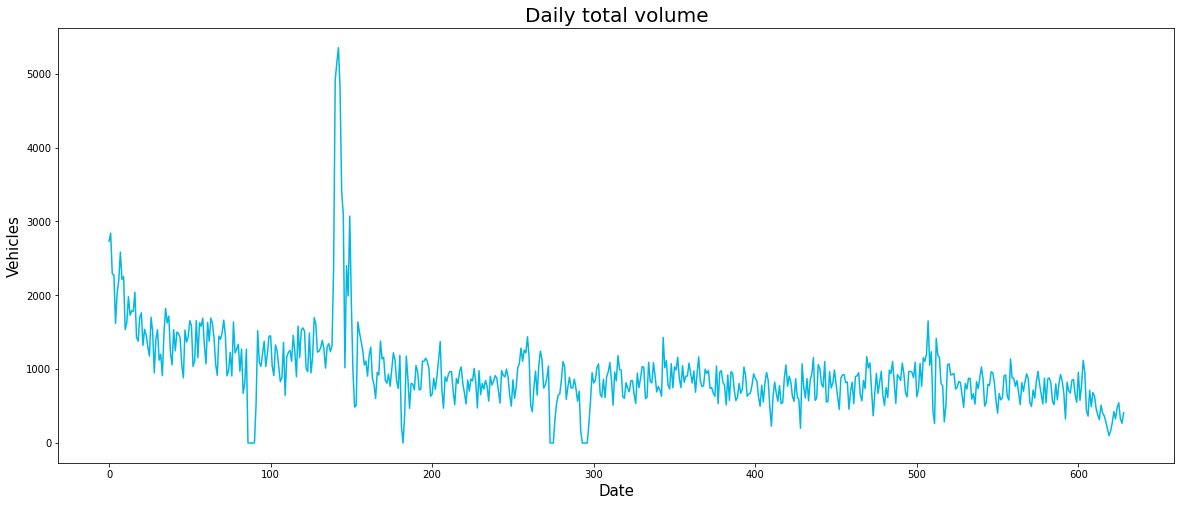

In [646]:
vhsa_prophet['y'].plot(style='-', figsize=(20,8), color="#00B9E3")
#rtms_volumen_total['Volume_total'].plot(style='-', figsize=(20,8), color="#00B9E3")
plt.title('Daily total volume',fontdict={'fontsize': 20})
plt.ylabel('Vehicles',fontdict={'fontsize': 15})
plt.xlabel('Date',fontdict={'fontsize': 15})
plt.show

In [0]:
#dir(Prophet)

In [0]:
#Modelo a utilizar.
m = Prophet(interval_width=0.80,
    growth='linear',
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=True,
    seasonality_mode='additive',)

In [649]:
Prophet.add_country_holidays(m, country_name = 'MX')

In [0]:
#m.train_holiday_names

In [651]:
m.fit(vhsa_prophet)

In [0]:
future = m.make_future_dataframe(periods=0,freq='D',include_history=True)

In [653]:
future

,ds
0,2018-08-01
1,2018-08-02
2,2018-08-03
3,2018-08-04
4,2018-08-05
...,...
624,2020-04-16
625,2020-04-17
626,2020-04-18
627,2020-04-19


In [0]:
forecast=m.predict(future)

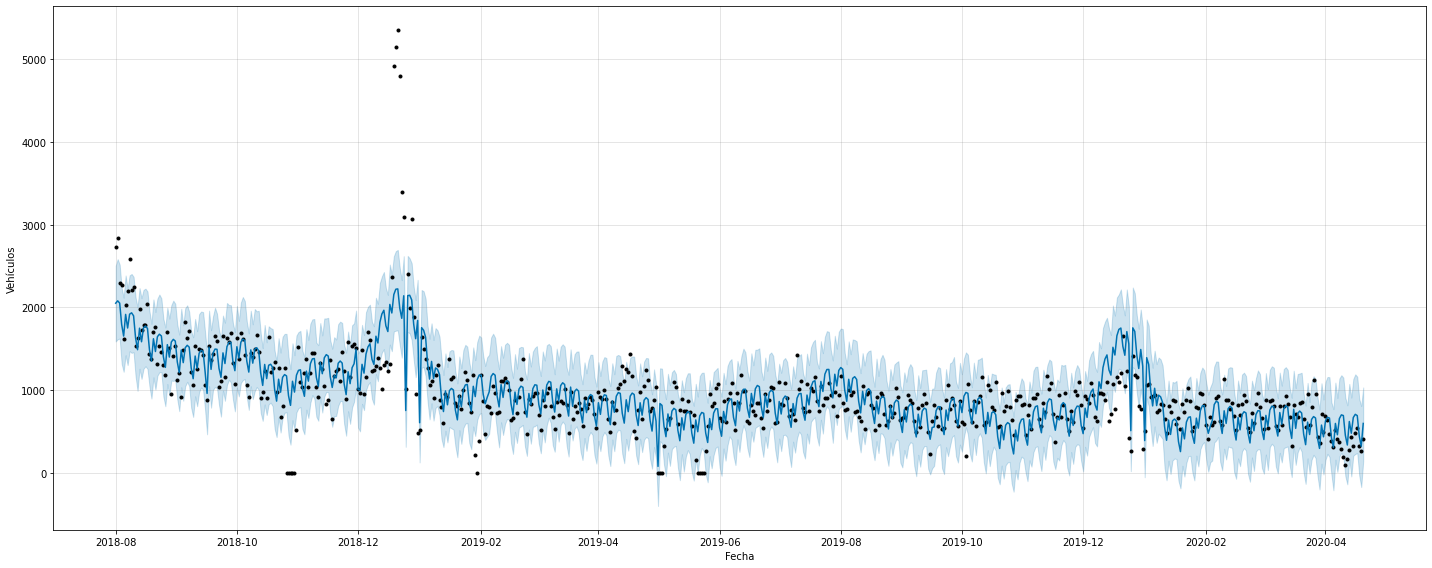

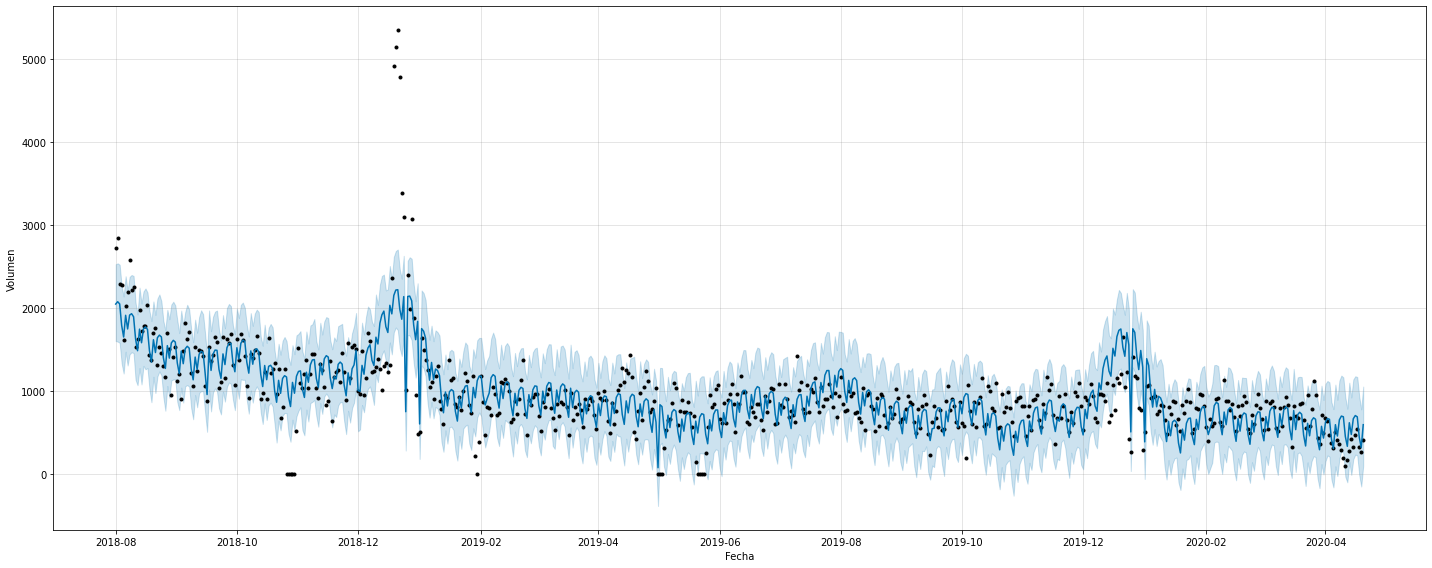

In [655]:
predict_fig = m.plot(m.predict(m.make_future_dataframe(periods=0,freq='D',include_history=True)), xlabel='Fecha', ylabel='Vehículos',figsize=(20,8))

predict_fig = m.plot(forecast, xlabel='Fecha', ylabel='Volumen',figsize=(20,8))

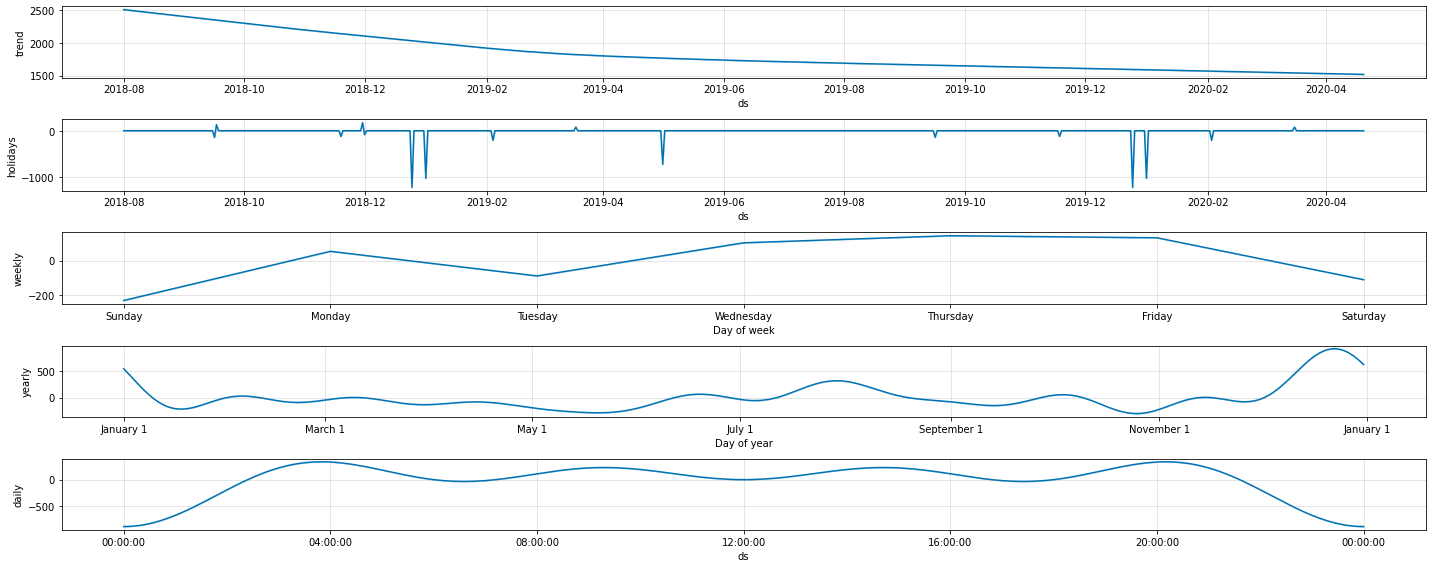

In [656]:
fig2 = m.plot_components(forecast,uncertainty=True,plot_cap=True,figsize=(20,8))

**Cross Validation.**

Measuring Forescast eror by comparing the predicted values with the actual values.

Initial: Size of the initial training period.

Period: Spacing between cut off dates.

Horizon: The forescast horizon (ds minus cutoff)

by default the initial training period is set to three times the horizon and cuttoff are made every half a horizon.


In [0]:
from fbprophet.diagnostics import cross_validation

In [658]:
cv=cross_validation(m,initial='503 days',horizon='125days',period='1 days')

INFO:fbprophet:Making 1 forecasts with cutoffs between 2019-12-17 00:00:00 and 2019-12-17 00:00:00


In [659]:
cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-12-18,1882.940733,1422.960017,2373.674611,1155.0,2019-12-17
1,2019-12-19,1983.345657,1511.094192,2487.512249,1104.0,2019-12-17
2,2019-12-20,2036.684022,1554.296079,2522.391155,1205.0,2019-12-17
3,2019-12-21,1813.885947,1336.818146,2261.259259,1652.0,2019-12-17
4,2019-12-22,1724.764002,1248.036799,2226.639588,1052.0,2019-12-17
...,...,...,...,...,...,...
120,2020-04-16,668.900365,220.993406,1149.895383,478.0,2019-12-17
121,2020-04-17,664.058242,183.067376,1144.255404,546.0,2019-12-17
122,2020-04-18,389.993774,-98.714015,840.802864,330.0,2019-12-17
123,2020-04-19,257.668670,-264.278288,735.887828,268.0,2019-12-17


In [0]:
from sklearn.metrics import mean_squared_error

In [0]:
RMSE_prophet = mean_squared_error(cv['y'],cv['yhat'],squared=False,)

In [662]:
RMSE_prophet

478.08379030345105

**Performance metrics**

In [0]:
from fbprophet.diagnostics import performance_metrics

In [0]:
performance_metrics=performance_metrics(cv)

In [665]:
performance_metrics.sort_values('mape')
#MDAPE -Median Percentage Absolute Percentage Error
#MAPE - Mean Absolute Percentage Error   Aaccuracy decreases as the forecast horizon expands 

#MAAPE - Mean Arctangent Absolute Percentage Error
#MAE - Mean Absolute Error
#MASE - Mean Absolute Scaled Error
#MSE - Mean Squared Error
#performance_metrics

,horizon,mse,rmse,mae,mape,mdape,coverage
15,27 days,73112.539729,270.393306,217.559563,0.269100,0.211643,0.916667
14,26 days,67886.904686,260.551156,210.231507,0.279425,0.211643,0.916667
16,28 days,70511.028442,265.539128,215.084218,0.284793,0.211643,0.916667
17,29 days,78972.702405,281.020822,223.967661,0.302263,0.211643,0.833333
18,30 days,99117.389845,314.829144,251.405310,0.334642,0.297529,0.750000
...,...,...,...,...,...,...,...
6,18 days,647561.412022,804.712006,712.670356,1.272056,0.676658,0.333333
3,15 days,696672.839583,834.669300,750.819182,1.293016,0.685696,0.250000
2,14 days,746172.096916,863.812536,794.077722,1.298746,0.711038,0.166667
5,17 days,696009.558317,834.271873,761.539764,1.306926,0.685078,0.250000


**Visualizing performance metrics**

Cutoff : How far into the future the predictions was.

In [0]:
from fbprophet.plot import plot_cross_validation_metric

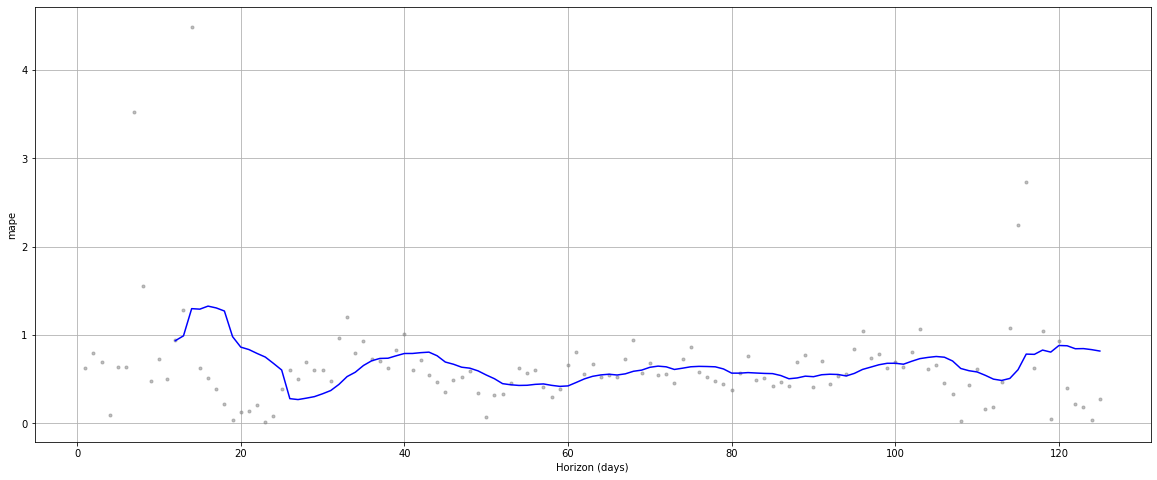

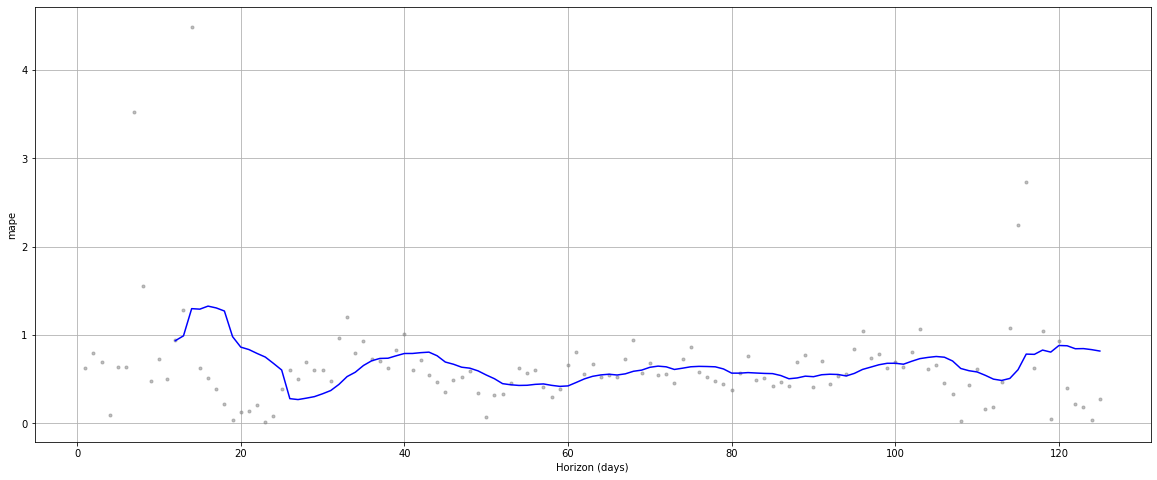

In [667]:
plot_cross_validation_metric(cv,metric='mape',figsize=(20,8))

# **LSTM**

In [0]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [0]:
gato=pd.read_csv('PATH/My Drive/AI/RBC_SMX/full_data.csv', sep=',', quotechar='"',error_bad_lines=False)

In [0]:
gato=gato.set_index('measuring_date')

In [671]:
gato

,0,Bateria (Volts),Humedad relativa (%),Humedad suelo mineral (m3/m3),Humedad suelo organico (m3/m3),Indice refraccion (VE),Lluvia Accu (mm),Lluvia Ins (mm),NaCl pavimento (%),Nivel agua pavimento (mm),Presion atmosferica (mb),Puerta Abierta Ins,Punto rocio (°C),Temperatura aire (°C),Temperatura pavimento (°C),Temperatura suelo (°C),Velocidad viento (Km/h),Viento direccion (°),Visibilidad (m),Carril1,Carril2,Volume_total
measuring_date,,,,,,,,,,,,,,,,,,,,,,
2018-08-01,0.0,13.67639,97.52651,0.423755,0.501240,5.159547,4.170003e+01,2.000000e-01,0.1,0.253,1016.317,0.0,24.35053,33.28250,59.27000,40.51090,19.660470,356.9752,10036.52,2254.0,478.0,2732.0
2018-08-02,0.0,13.38554,96.80051,0.379629,0.453101,4.788881,1.010000e+01,0.000000e+00,0.1,0.745,1015.436,0.0,24.93529,32.67450,53.74000,39.26754,12.478210,359.5107,10034.29,2269.0,573.0,2842.0
2018-08-03,0.0,13.60816,91.23650,0.286073,0.351041,4.003013,0.000000e+00,0.000000e+00,0.0,0.000,1015.963,0.0,24.73622,33.37600,58.26000,38.23433,13.203020,155.9569,10032.42,1900.0,390.0,2290.0
2018-08-04,0.0,13.47807,93.30450,0.241150,0.302034,3.625659,0.000000e+00,0.000000e+00,0.0,0.000,1015.436,0.0,23.98996,33.31700,61.07000,40.17662,15.030010,168.2272,10034.73,1935.0,340.0,2275.0
2018-08-05,0.0,13.42280,93.59100,0.354046,0.425193,4.573989,3.599999e+00,1.000000e-01,0.1,0.259,1016.381,0.0,24.45906,33.29501,58.42000,39.76162,18.629970,153.7696,10033.96,1356.0,263.0,1619.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-16,0.0,13.31214,93.34001,0.037378,0.079737,1.913977,-3.330669e-14,-5.551115e-17,0.0,0.000,1016.811,0.0,25.93962,33.46900,32.83333,41.42786,10.556100,356.8407,10040.38,444.0,34.0,478.0
2020-04-17,0.0,13.69420,93.32101,0.039688,0.082257,1.933382,-3.247402e-14,-5.551115e-17,0.0,0.000,1016.887,0.0,26.23873,35.80901,40.97500,45.99167,12.465040,356.2198,10043.58,511.0,35.0,546.0
2020-04-18,0.0,13.56426,95.71099,0.036771,0.079075,1.908874,3.240000e-01,-5.551115e-17,0.0,0.000,1015.223,0.0,26.79670,35.28300,41.30000,44.62037,8.238906,359.3000,10043.54,313.0,17.0,330.0


In [0]:
VHSA=gato.copy()

In [0]:
gato.drop(columns=['0','Bateria (Volts)', 'Lluvia Ins (mm)', 'Lluvia Accu (mm)','Viento direccion (°)','Presion atmosferica (mb)','Punto rocio (°C)',
                           'Temperatura suelo (°C)','Temperatura pavimento (°C)','NaCl pavimento (%)','Nivel agua pavimento (mm)','Velocidad viento (Km/h)',
                           'Humedad relativa (%)','Indice refraccion (VE)','Humedad suelo mineral (m3/m3)','Humedad suelo organico (m3/m3)','Puerta Abierta Ins',
                           'Carril1','Carril2','Temperatura aire (°C)','Visibilidad (m)','Carril1','Carril2'],axis=1,inplace=True)

In [0]:
gato.index= pd.to_datetime(gato.index)

In [0]:
gato.reset_index(drop=True, inplace=True)

In [676]:
gato

,Volume_total
0,2732.0
1,2842.0
2,2290.0
3,2275.0
4,1619.0
...,...
624,478.0
625,546.0
626,330.0
627,268.0


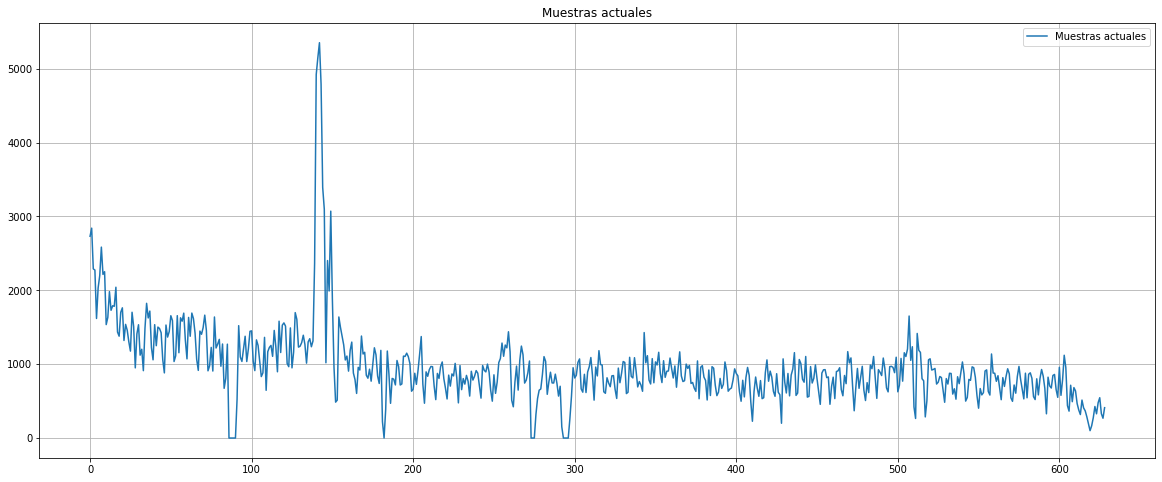

In [677]:
plt.figure(figsize=(20, 8))
plt.plot(gato)
plt.legend(['Muestras actuales'])
plt.title('Muestras actuales') 
plt.grid()
plt.show()


In [0]:
gato = gato.values
gato = gato.astype('float32')

In [0]:
#normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
gato = scaler.fit_transform(gato)

In [680]:
# split into train and test sets
train_size = int(len(gato) * 0.802)
test_size = len(gato) - train_size
train_golden, test_golden = gato[0:train_size,:], gato[train_size:len(gato),:]
print(len(train_golden), len(test_golden))

504 125


# **Baseline method  -Zero Rule algorithm-**

In [0]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error

In [0]:
# Create lagged dataset
dos=VHSA.copy()
dos.drop(columns=['0','Bateria (Volts)', 'Lluvia Ins (mm)', 'Lluvia Accu (mm)','Viento direccion (°)','Presion atmosferica (mb)','Punto rocio (°C)',
                           'Temperatura suelo (°C)','Temperatura pavimento (°C)','NaCl pavimento (%)','Nivel agua pavimento (mm)','Velocidad viento (Km/h)',
                           'Humedad relativa (%)','Indice refraccion (VE)','Humedad suelo mineral (m3/m3)','Humedad suelo organico (m3/m3)','Puerta Abierta Ins',
                           'Carril1','Carril2','Temperatura aire (°C)','Visibilidad (m)','Carril1','Carril2'],axis=1,inplace=True)
values = DataFrame(dos)

In [683]:
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
print(dataframe.head(5))

                   t-1     t+1
measuring_date                
2018-08-01         NaN  2732.0
2018-08-02      2732.0  2842.0
2018-08-03      2842.0  2290.0
2018-08-04      2290.0  2275.0
2018-08-05      2275.0  1619.0


In [0]:
# split into train and test sets
X = dataframe.values
train_size_i = int(len(X) * 0.802)
train_i, test_i = X[1:train_size_i], X[train_size_i:]
train_X_i, train_y_i = train_i[:,0], train_i[:,1]
test_X_i, test_y_i = test_i[:,0], test_i[:,1]

In [0]:
# persistence model
#We can define our persistence model as a function that returns the value provided as input.
def model_persistence(x):
	return x

 Train RMSE: 350.94
 Train RMSE: 251.19


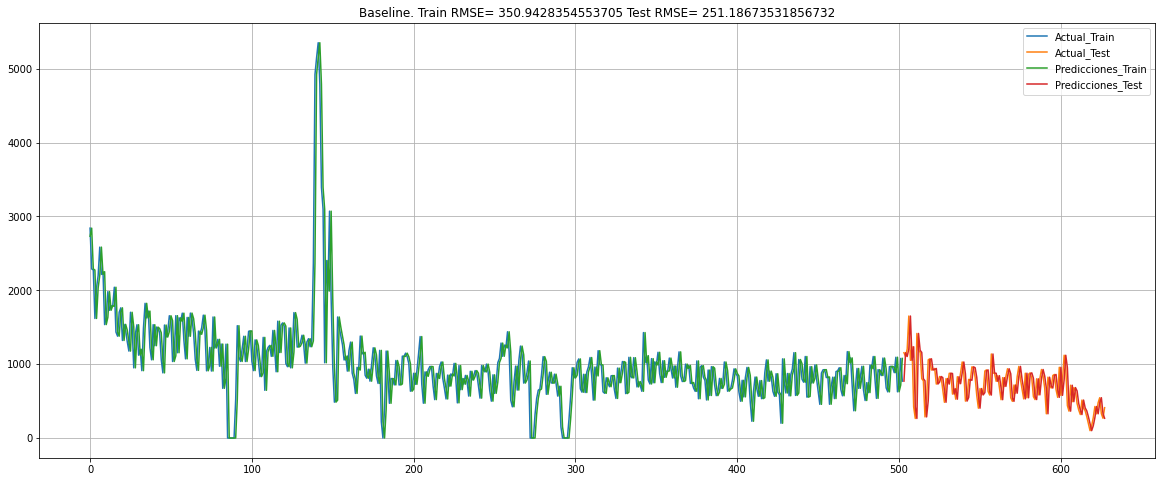

In [686]:
# walk-forward validation Train
predictions_train = list()
for x in train_X_i:
	yhat_train_i = model_persistence(x)
	predictions_train.append(yhat_train_i)
train_score_base = mean_squared_error(train_y_i, predictions_train,squared=False)

# walk-forward validation Test
predictions_test = list()
for x in test_X_i:
	yhat_test_i = model_persistence(x)
	predictions_test.append(yhat_test_i)
test_score_base = mean_squared_error(test_y_i, predictions_test,squared=False)

print(' Train RMSE: %.2f' % train_score_base)
print(' Train RMSE: %.2f' % test_score_base)
 
# plot predictions and expected results
plt.figure(figsize=(20, 8))
plt.grid()

pyplot.plot(train_y_i)
pyplot.plot([None for i in train_y_i] + [x for x in test_y_i])
pyplot.plot([x for x in predictions_train])
pyplot.plot([None for i in train_y_i] + [x for x in predictions_test])

plt.legend(['Actual_Train','Actual_Test', 'Predicciones_Train','Predicciones_Test'])
plt.title('Baseline. Train RMSE= '+str(train_score_base)+' Test RMSE= '+str(test_score_base)) 
pyplot.show()

# **LSTM Regression**

In [0]:
# convert an array of values into a dataset matrix
def create_dataset(gato, look_back=1):
	dataX, dataY = [], []
	for i in range(len(gato)-look_back-1):
		a = gato[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(gato[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [0]:
# Prepare the train and test datasets for modeling; reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train_golden, look_back)
testX, testY = create_dataset(test_golden, look_back)

In [0]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [690]:
trainX.shape

(502, 1, 1)

In [0]:
#from keras import backend 
#def rmse(y_true, y_pred):
#	return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

Train on 502 samples, validate on 123 samples
Epoch 1/100
 - 3s - loss: 0.0056 - val_loss: 0.0018
Epoch 2/100
 - 2s - loss: 0.0043 - val_loss: 0.0018
Epoch 3/100
 - 2s - loss: 0.0042 - val_loss: 0.0018
Epoch 4/100
 - 2s - loss: 0.0041 - val_loss: 0.0018
Epoch 5/100
 - 2s - loss: 0.0040 - val_loss: 0.0018
Epoch 6/100
 - 2s - loss: 0.0040 - val_loss: 0.0018
Epoch 7/100
 - 2s - loss: 0.0040 - val_loss: 0.0018
Epoch 8/100
 - 2s - loss: 0.0039 - val_loss: 0.0018
Epoch 9/100
 - 2s - loss: 0.0039 - val_loss: 0.0018
Epoch 10/100
 - 2s - loss: 0.0039 - val_loss: 0.0018
Epoch 11/100
 - 2s - loss: 0.0039 - val_loss: 0.0018
Epoch 12/100
 - 2s - loss: 0.0039 - val_loss: 0.0018
Epoch 13/100
 - 2s - loss: 0.0039 - val_loss: 0.0018
Epoch 14/100
 - 2s - loss: 0.0039 - val_loss: 0.0018
Epoch 15/100
 - 2s - loss: 0.0039 - val_loss: 0.0018
Epoch 16/100
 - 2s - loss: 0.0039 - val_loss: 0.0018
Epoch 17/100
 - 2s - loss: 0.0039 - val_loss: 0.0018
Epoch 18/100
 - 2s - loss: 0.0039 - val_loss: 0.0018
Epoch 19/

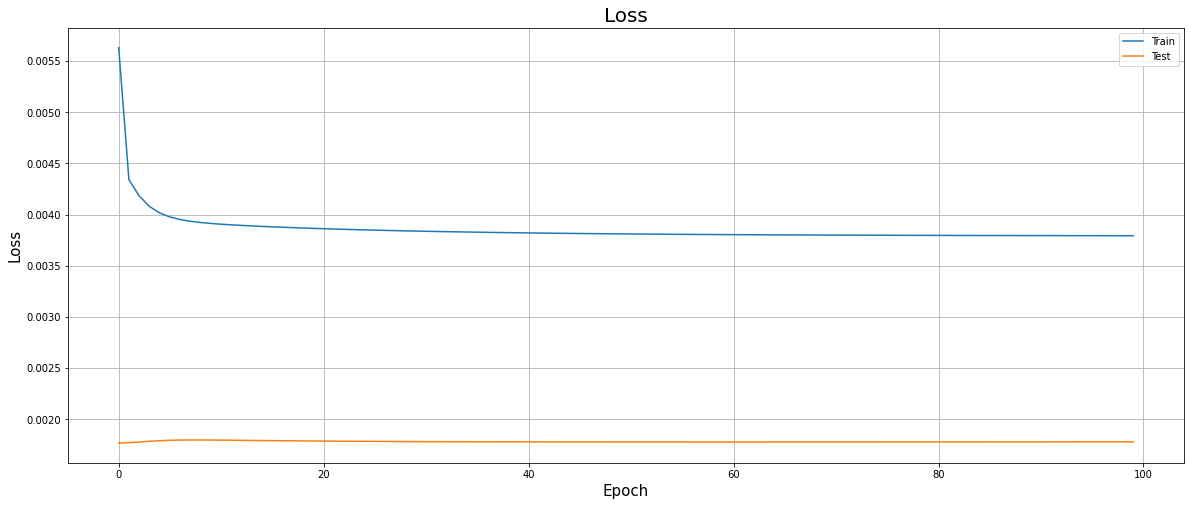

In [692]:
model_regression = Sequential()
model_regression.add(LSTM(4, input_shape=(1, look_back)))
model_regression.add(Dense(1))
model_regression.compile(loss='mean_squared_error', optimizer='adam')
#model_regression.compile(loss='mean_squared_error', optimizer='adam',metrics=[rmse])
# fit network
history_regression = model_regression.fit(trainX, trainY, epochs=100, batch_size=1, validation_data=(testX, testY), verbose=2, shuffle=False)
# plot history
plt.figure(figsize=(20, 8))
pyplot.plot(history_regression.history['loss'], label='Train')
pyplot.plot(history_regression.history['val_loss'], label='Test')
pyplot.legend()
plt.title('Loss',fontdict={'fontsize': 20})
plt.ylabel('Loss',fontdict={'fontsize': 15})
plt.xlabel('Epoch',fontdict={'fontsize': 15})
plt.grid()
pyplot.show()

In [693]:
# make predictions
trainPredict = model_regression.predict(trainX)
testPredict = model_regression.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score_regression: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score_regression: %.2f RMSE' % (testScore))

Train Score_regression: 340.02 RMSE
Test Score_regression: 225.82 RMSE


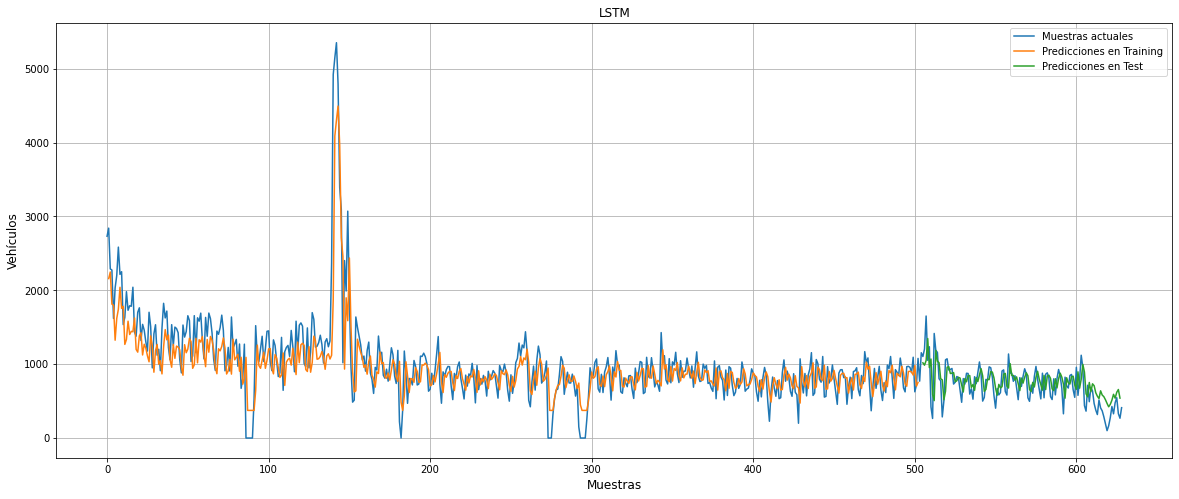

In [694]:
# shift train predictions for plotting
plt.figure(figsize=(20, 8))
trainPredictPlot = numpy.empty_like(gato)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(gato)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(gato)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(gato))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Muestras actuales','Predicciones en Training','Predicciones en Test'])
#plt.title('LSTM. Train RMSE= '+str(trainScore)+' Test RMSE= '+str(testScore)) 
plt.title('LSTM')
plt.ylabel('Vehículos',fontdict={'fontsize': 12})
plt.xlabel('Muestras',fontdict={'fontsize': 12})
plt.grid(True)
plt.show()

# **LSTM WINDOWING**

In [0]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [0]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [0]:
# reshape into X=t and Y=t+1
look_back = 15 #Window
trainX, trainY = create_dataset(train_golden, look_back)
testX, testY = create_dataset(test_golden, look_back)

In [0]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [0]:
#from keras import backend 
#def rmse(y_true, y_pred):
#	return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

Train on 488 samples, validate on 109 samples
Epoch 1/100
 - 3s - loss: 0.0155 - val_loss: 0.0018
Epoch 2/100
 - 2s - loss: 0.0073 - val_loss: 0.0017
Epoch 3/100
 - 2s - loss: 0.0068 - val_loss: 0.0017
Epoch 4/100
 - 2s - loss: 0.0063 - val_loss: 0.0017
Epoch 5/100
 - 2s - loss: 0.0059 - val_loss: 0.0016
Epoch 6/100
 - 2s - loss: 0.0056 - val_loss: 0.0016
Epoch 7/100
 - 2s - loss: 0.0054 - val_loss: 0.0016
Epoch 8/100
 - 2s - loss: 0.0052 - val_loss: 0.0015
Epoch 9/100
 - 2s - loss: 0.0050 - val_loss: 0.0015
Epoch 10/100
 - 2s - loss: 0.0048 - val_loss: 0.0014
Epoch 11/100
 - 2s - loss: 0.0047 - val_loss: 0.0014
Epoch 12/100
 - 2s - loss: 0.0045 - val_loss: 0.0014
Epoch 13/100
 - 2s - loss: 0.0044 - val_loss: 0.0013
Epoch 14/100
 - 2s - loss: 0.0043 - val_loss: 0.0013
Epoch 15/100
 - 2s - loss: 0.0042 - val_loss: 0.0013
Epoch 16/100
 - 2s - loss: 0.0041 - val_loss: 0.0013
Epoch 17/100
 - 2s - loss: 0.0040 - val_loss: 0.0012
Epoch 18/100
 - 2s - loss: 0.0039 - val_loss: 0.0012
Epoch 19/

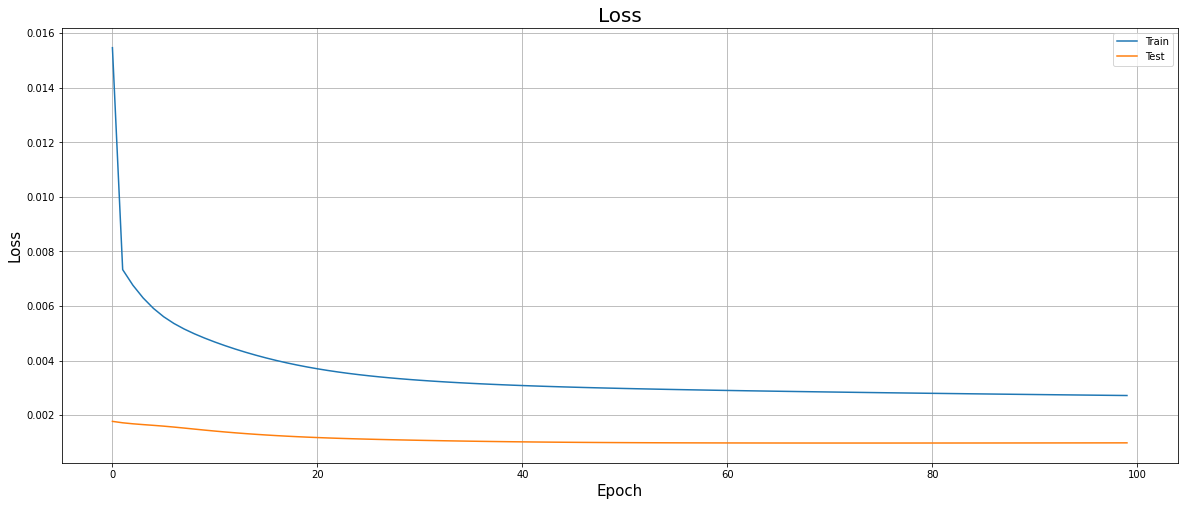

In [700]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
#model.compile(loss='mean_squared_error', optimizer='adam',metrics=[rmse])
#model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# fit network
history_window = model.fit(trainX, trainY, epochs=100, batch_size=1, validation_data=(testX, testY), verbose=2, shuffle=False)
# plot history
plt.figure(figsize=(20, 8))
pyplot.plot(history_window.history['loss'], label='Train')
pyplot.plot(history_window.history['val_loss'], label='Test')
pyplot.legend()
plt.title('Loss',fontdict={'fontsize': 20})
plt.ylabel('Loss',fontdict={'fontsize': 15})
plt.xlabel('Epoch',fontdict={'fontsize': 15})
plt.grid()
pyplot.show()

In [0]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [0]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [703]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 303.46 RMSE
Test Score: 167.78 RMSE


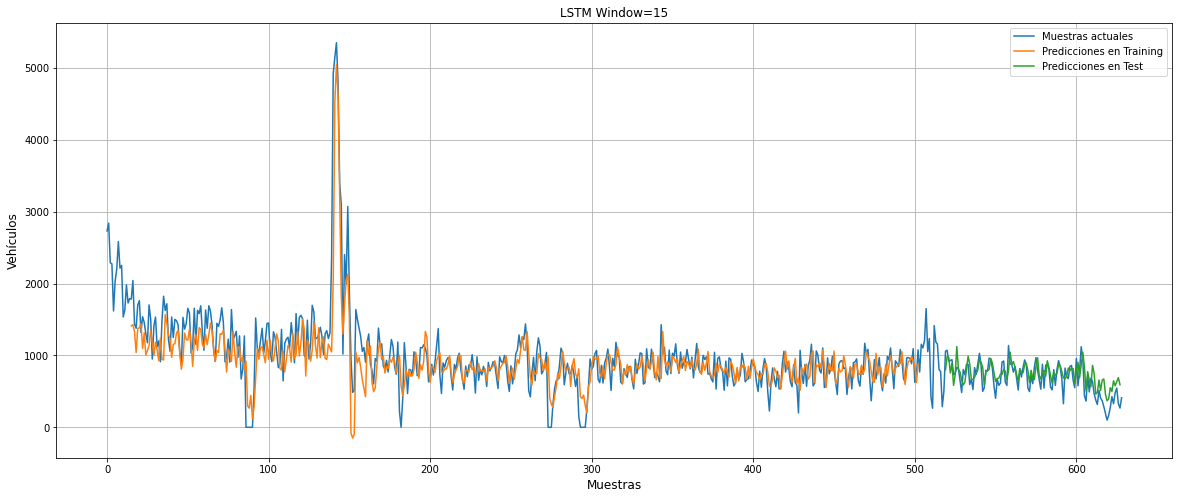

In [704]:
# shift train predictions for plotting
plt.figure(figsize=(20, 8))
trainPredictPlot = numpy.empty_like(gato)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(gato)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(gato)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(gato))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)

plt.legend(['Muestras actuales','Predicciones en Training','Predicciones en Test'])
plt.title('LSTM Window=15')
plt.ylabel('Vehículos',fontdict={'fontsize': 12})
plt.xlabel('Muestras',fontdict={'fontsize': 12})
plt.grid(True)
plt.show()

# **LSTM MULTIVARIATE**

In [705]:
from matplotlib import pyplot
perro = VHSA.copy()
perro.drop(columns=['0','Bateria (Volts)','Viento direccion (°)','Presion atmosferica (mb)','Punto rocio (°C)','Lluvia Accu (mm)',
                           'Temperatura suelo (°C)','Temperatura pavimento (°C)','NaCl pavimento (%)','Nivel agua pavimento (mm)','Velocidad viento (Km/h)',
                           'Humedad relativa (%)','Indice refraccion (VE)','Humedad suelo mineral (m3/m3)','Humedad suelo organico (m3/m3)','Puerta Abierta Ins',
                           'Carril1','Carril2'],axis=1,inplace=True)
perro

,Lluvia Ins (mm),Temperatura aire (°C),Visibilidad (m),Volume_total
measuring_date,,,,
2018-08-01,2.000000e-01,33.28250,10036.52,2732.0
2018-08-02,0.000000e+00,32.67450,10034.29,2842.0
2018-08-03,0.000000e+00,33.37600,10032.42,2290.0
2018-08-04,0.000000e+00,33.31700,10034.73,2275.0
2018-08-05,1.000000e-01,33.29501,10033.96,1619.0
...,...,...,...,...
2020-04-16,-5.551115e-17,33.46900,10040.38,478.0
2020-04-17,-5.551115e-17,35.80901,10043.58,546.0
2020-04-18,-5.551115e-17,35.28300,10043.54,330.0


<Figure size 432x288 with 0 Axes>

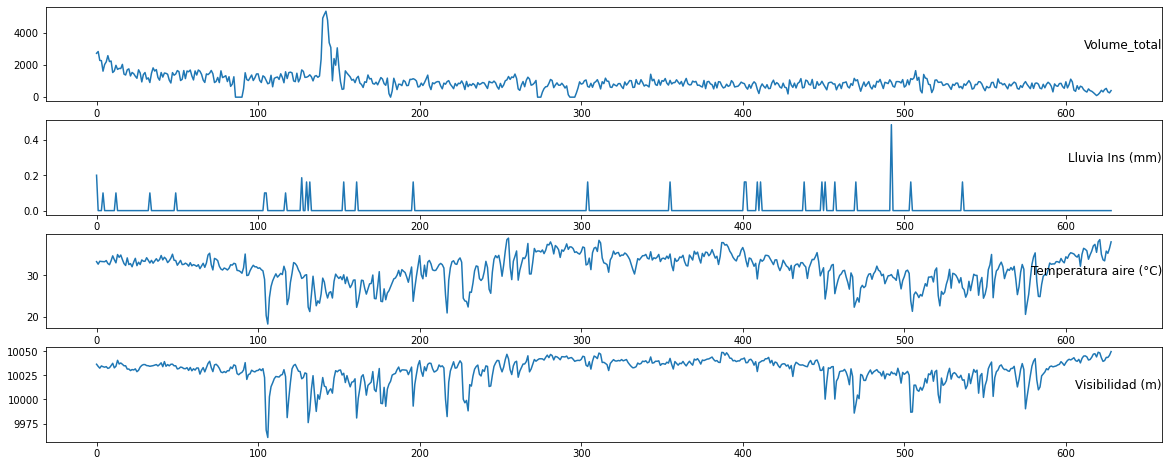

In [706]:
values_perro = perro.values
# specify columns to plot
groups = [3,0,1,2]
i = 1
# plot each column
pyplot.figure()
plt.figure(figsize=(20, 8))
plt.grid()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values_perro[:, group])
	pyplot.title(perro.columns[group], y=0.5, loc='right')
	i += 1

pyplot.show()

In [707]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df =pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = perro
values = perro.values
# integer encode direction
#encoder = LabelEncoder()
#values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[0,1,2]], axis=1, inplace=True)                             
print(reframed.head())

   var4(t-1)       var1(t)   var2(t)   var3(t)   var4(t)
1   0.510368  1.142205e-16  0.696827  0.827606  0.530917
2   0.530917  1.142205e-16  0.730833  0.806618  0.427797
3   0.427797  1.142205e-16  0.727973  0.832550  0.424995
4   0.424995  2.057613e-01  0.726907  0.823906  0.302447
5   0.302447  1.142205e-16  0.725089  0.818077  0.379787


In [708]:
# split into train and test sets
values = reframed.values
n_train_ =  503 #
train = values[:n_train_, :]
test = values[n_train_:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, 4]
test_X, test_y = test[:, :-1], test[:, 4]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(503, 1, 4) (503,) (125, 1, 4) (125,)


In [0]:
#from keras import backend 
#def rmse(y_true, y_pred):
#	return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

Train on 503 samples, validate on 125 samples
Epoch 1/100
 - 0s - loss: 0.2216 - val_loss: 0.1422
Epoch 2/100
 - 0s - loss: 0.1901 - val_loss: 0.1129
Epoch 3/100
 - 0s - loss: 0.1620 - val_loss: 0.0857
Epoch 4/100
 - 0s - loss: 0.1355 - val_loss: 0.0616
Epoch 5/100
 - 0s - loss: 0.1090 - val_loss: 0.0448
Epoch 6/100
 - 0s - loss: 0.0858 - val_loss: 0.0397
Epoch 7/100
 - 0s - loss: 0.0717 - val_loss: 0.0427
Epoch 8/100
 - 0s - loss: 0.0663 - val_loss: 0.0481
Epoch 9/100
 - 0s - loss: 0.0646 - val_loss: 0.0506
Epoch 10/100
 - 0s - loss: 0.0638 - val_loss: 0.0507
Epoch 11/100
 - 0s - loss: 0.0634 - val_loss: 0.0503
Epoch 12/100
 - 0s - loss: 0.0632 - val_loss: 0.0500
Epoch 13/100
 - 0s - loss: 0.0631 - val_loss: 0.0497
Epoch 14/100
 - 0s - loss: 0.0629 - val_loss: 0.0495
Epoch 15/100
 - 0s - loss: 0.0627 - val_loss: 0.0493
Epoch 16/100
 - 0s - loss: 0.0625 - val_loss: 0.0492
Epoch 17/100
 - 0s - loss: 0.0622 - val_loss: 0.0490
Epoch 18/100
 - 0s - loss: 0.0620 - val_loss: 0.0488
Epoch 19/

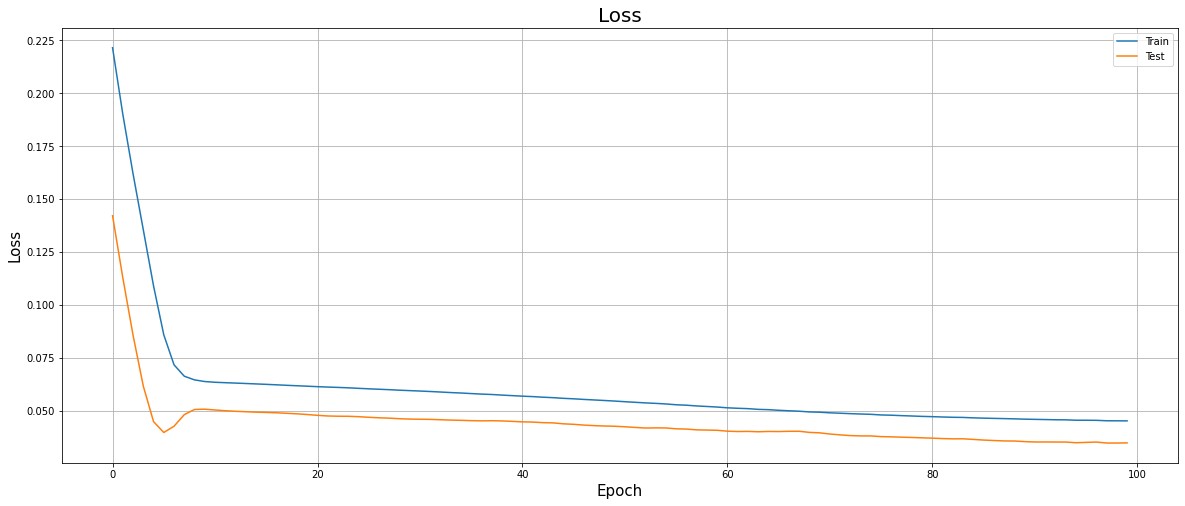

In [710]:
# design network
model = Sequential()
model.add(LSTM(4, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
#model.compile(loss='mean_squared_error', optimizer='adam',metrics=[rmse])
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=32, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.figure(figsize=(20, 8))
pyplot.plot(history.history['loss'], label='Train')
pyplot.plot(history.history['val_loss'], label='Test')
pyplot.legend()
plt.title('Loss',fontdict={'fontsize': 20})
plt.ylabel('Loss',fontdict={'fontsize': 15})
plt.xlabel('Epoch',fontdict={'fontsize': 15})
plt.grid()
pyplot.show()

In [0]:
from numpy import concatenate, sqrt
from sklearn.metrics import mean_squared_error
# make a prediction for training
yhat_train = model.predict(train_X)
train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

In [712]:
# invert scaling for actual
train_y = train_y.reshape((len(train_y), 1))
inv_y_train = np.concatenate((train_y, train_X[:, -3:]), axis=1)
inv_y_train = scaler.inverse_transform(inv_y_train)
inv_y_train = inv_y_train[:,0]
# calculate RMSE
rmse_train_win = sqrt(mean_squared_error(inv_y_train, yhat_train))
print('Train RMSE: %.3f' % rmse_train_win)

Train RMSE: 0.098


In [0]:
from numpy import concatenate, sqrt
from sklearn.metrics import mean_squared_error
# make a prediction for test
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

In [714]:
# invert scaling for actual for test
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -3:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse_test_win = sqrt(mean_squared_error(inv_y, yhat))
print('Test RMSE: %.3f' % rmse_test_win)

Test RMSE: 0.091


<Figure size 432x288 with 0 Axes>

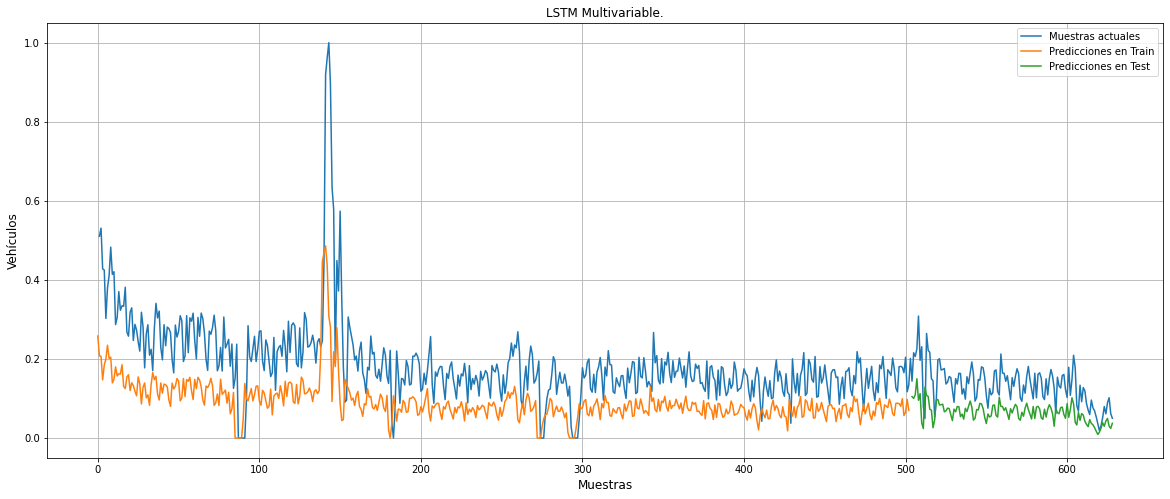

In [715]:
# plot baseline and predictions
pyplot.figure()
plt.figure(figsize=(20, 8))
plt.plot(reframed['var4(t-1)'])
plt.plot(inv_y_train)
plt.plot(pd.Series(range(len(inv_y_train)+1,len(inv_y_train)+len(inv_y)+1)),inv_y)
plt.grid(True)
#plt.title('LSTM Multivariable. Train RMSE= '+str(rmse_train_win)+' Test RMSE= '+str(rmse_test_win)) 
plt.title('LSTM Multivariable.') 
plt.ylabel('Vehículos',fontdict={'fontsize': 12})
plt.xlabel('Muestras',fontdict={'fontsize': 12})
plt.legend(['Muestras actuales','Predicciones en Train', 'Predicciones en Test'])
plt.grid(True)
plt.show()